In [2]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [3]:
# plot settings
%matplotlib inline
plt.style.use('bmh')   
#                        plt.style.available = ['Solarize_Light2', '_classic_test_patch', 'bmh',
#                                             'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot',
#                                             'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 
#                                             'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 
#                                             'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 
#                                             'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 
#                                             'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

In [4]:
# importing datasets

#df = pd.read_csv('./countries-aggregated.csv',parse_dates=['Date'])
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',parse_dates = ['Date'])

In [5]:
#understanding dataset
df.describe()

,Confirmed,Recovered,Deaths
count,7.891200e+04,7.891200e+04,78912.000000
mean,1.826397e+05,1.080352e+05,4709.104395
std,1.097404e+06,5.867589e+05,23007.817025
min,0.000000e+00,0.000000e+00,0.000000
25%,1.080000e+02,2.200000e+01,1.000000
50%,3.664000e+03,1.742000e+03,66.000000
75%,5.022825e+04,2.461875e+04,868.000000
max,2.899883e+07,1.088280e+07,525031.000000


In [6]:
#preparing data

df['TotalCases'] = df[['Confirmed', 'Recovered','Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,TotalCases
0,2020-01-22,Afghanistan,0,0.0,0,0.0
1,2020-01-23,Afghanistan,0,0.0,0,0.0
2,2020-01-24,Afghanistan,0,0.0,0,0.0
3,2020-01-25,Afghanistan,0,0.0,0,0.0
4,2020-01-26,Afghanistan,0,0.0,0,0.0


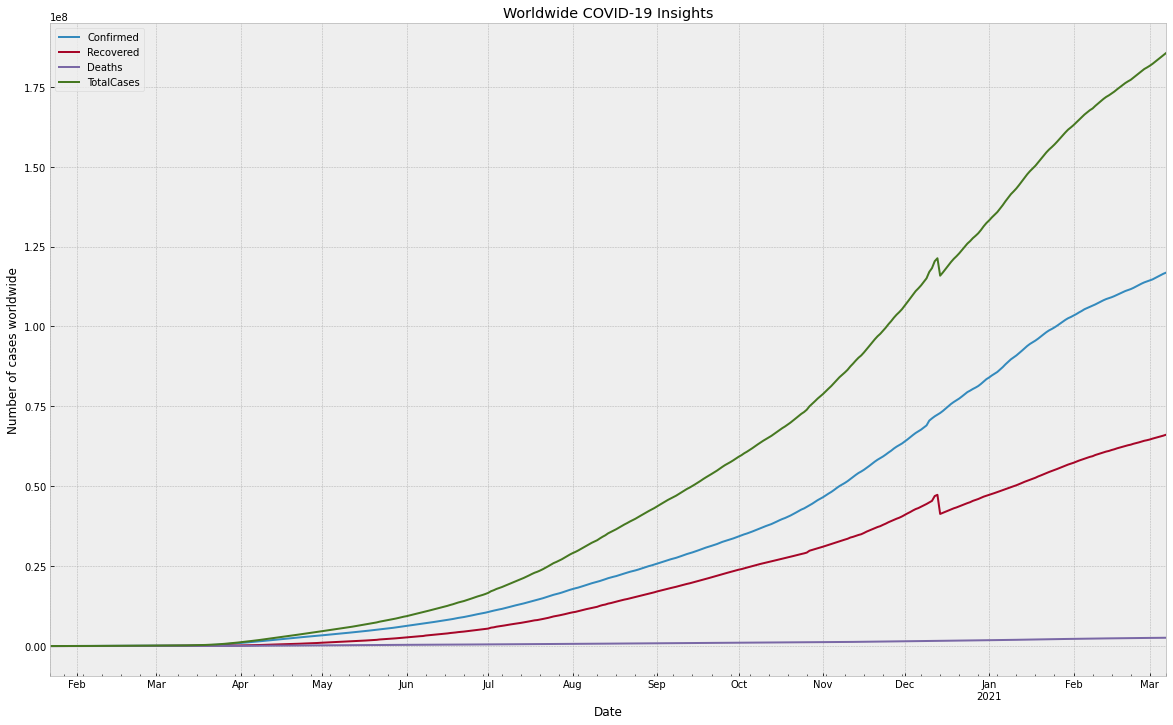

In [7]:
#Worldwide COVID-19 Insights

worldwide_df = df.groupby(['Date']).sum()
lineChart = worldwide_df.plot(figsize=(20,12))
plt.rc('font', size=20)          # both axes label -> controls default text sizes
plt.rc('axes', titlesize=30)
plt.rc('legend', fontsize=15)
lineChart.set_xlabel('Date')
lineChart.set_ylabel('Number of cases worldwide')
lineChart.title.set_text('Worldwide COVID-19 Insights')

plt.show()

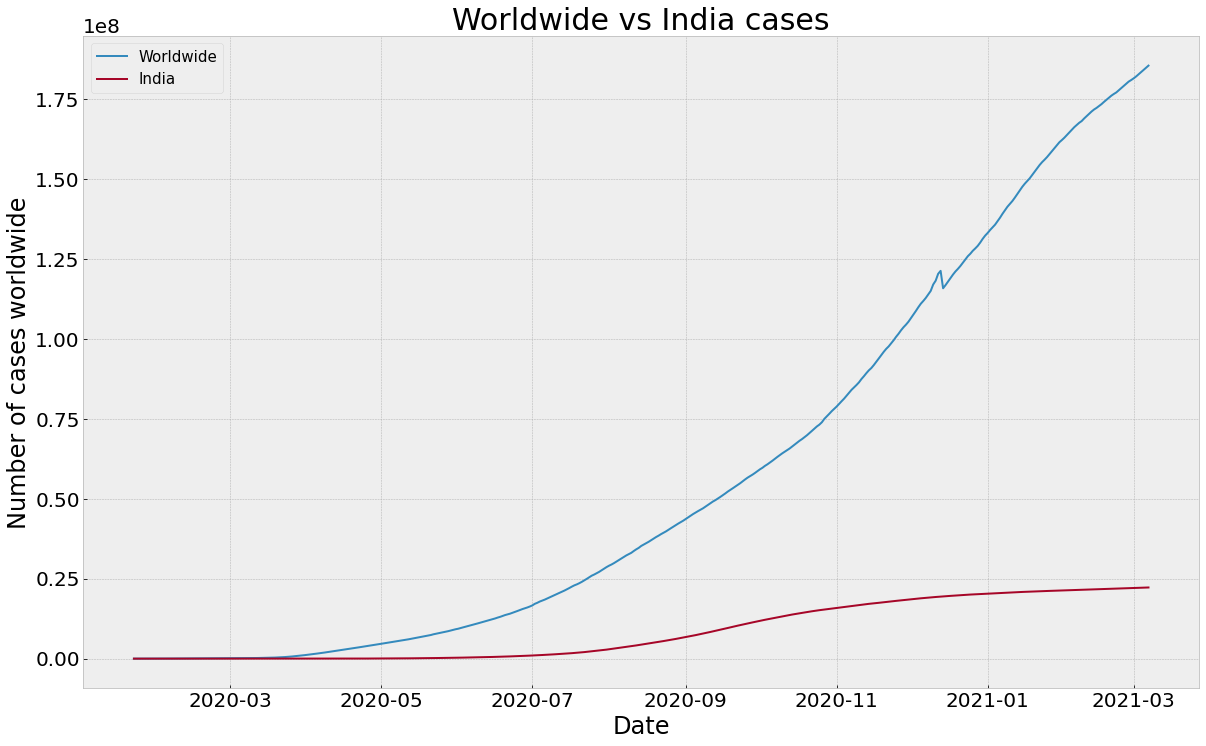

In [8]:
# Worldwide vs India cases

#daily analysis
india_df = df[df['Country']=='India'].groupby(['Date']).sum()
india_df.head()

Chart = plt.figure(figsize=(20,12))
ax = Chart.add_subplot(111)
plt.rc('font', size=30)          
plt.rc('axes', titlesize=45)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

ax.plot(worldwide_df[['TotalCases']],label = 'Worldwide')
ax.plot(india_df[['TotalCases']],label = 'India')

ax.set_xlabel('Date')
ax.set_ylabel('Number of cases worldwide')
ax.title.set_text('Worldwide vs India cases')
plt.legend(loc='upper left')
plt.show()


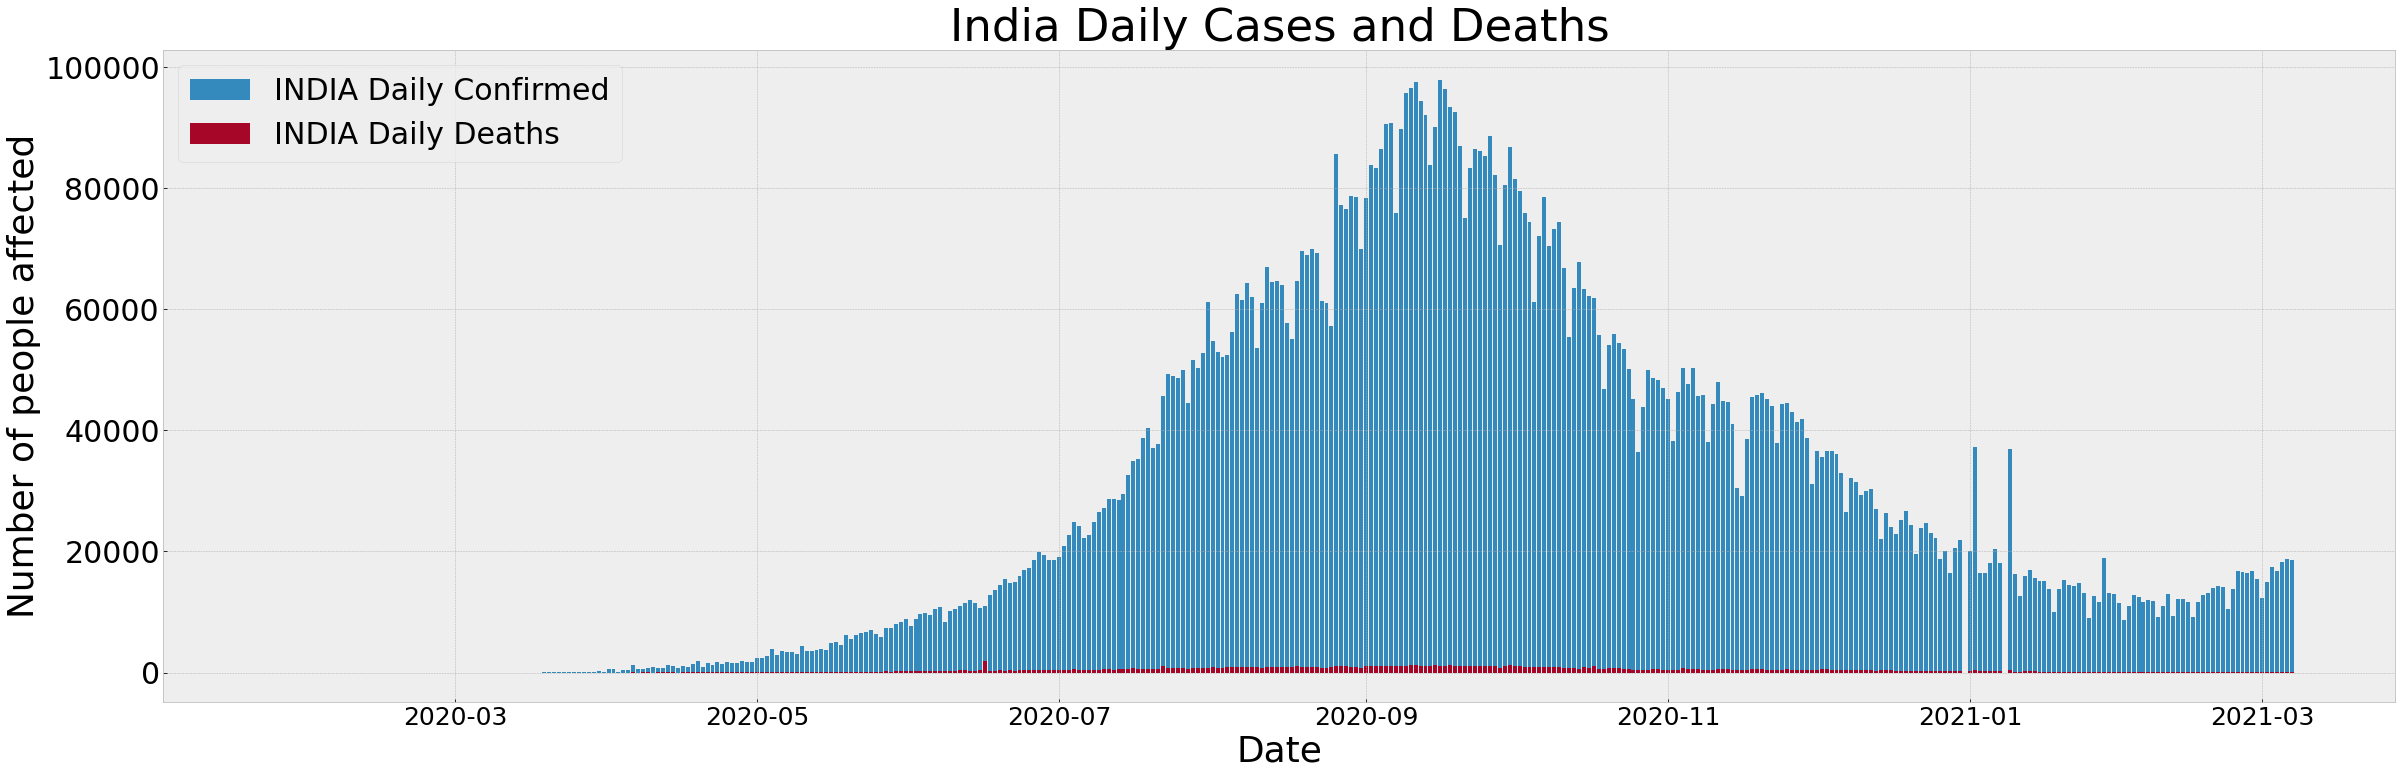

In [9]:
#India Daily Cases and Deaths

#india_df = india_df.reset_index()
india_df['Daily Confirmed'] = india_df['Confirmed'].sub(india_df['Confirmed'].shift())
india_df['Daily Deaths'] = india_df['Deaths'].sub(india_df['Deaths'].shift())

Chart = plt.figure(figsize=(40,12))

plt.rc('font', size=30)          # both axes label -> controls default text sizes
plt.rc('axes', titlesize=45)     # title -> fontsize of the axes title
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)

ax = Chart.add_subplot(111)



ax.bar(india_df.index,india_df['Daily Confirmed'],label='INDIA Daily Confirmed')
ax.bar(india_df.index,india_df['Daily Deaths'],label='INDIA Daily Deaths')

ax.set_xlabel('Date')
ax.set_ylabel('Number of people affected')
ax.title.set_text('India Daily Cases and Deaths')
plt.legend(loc='upper left')





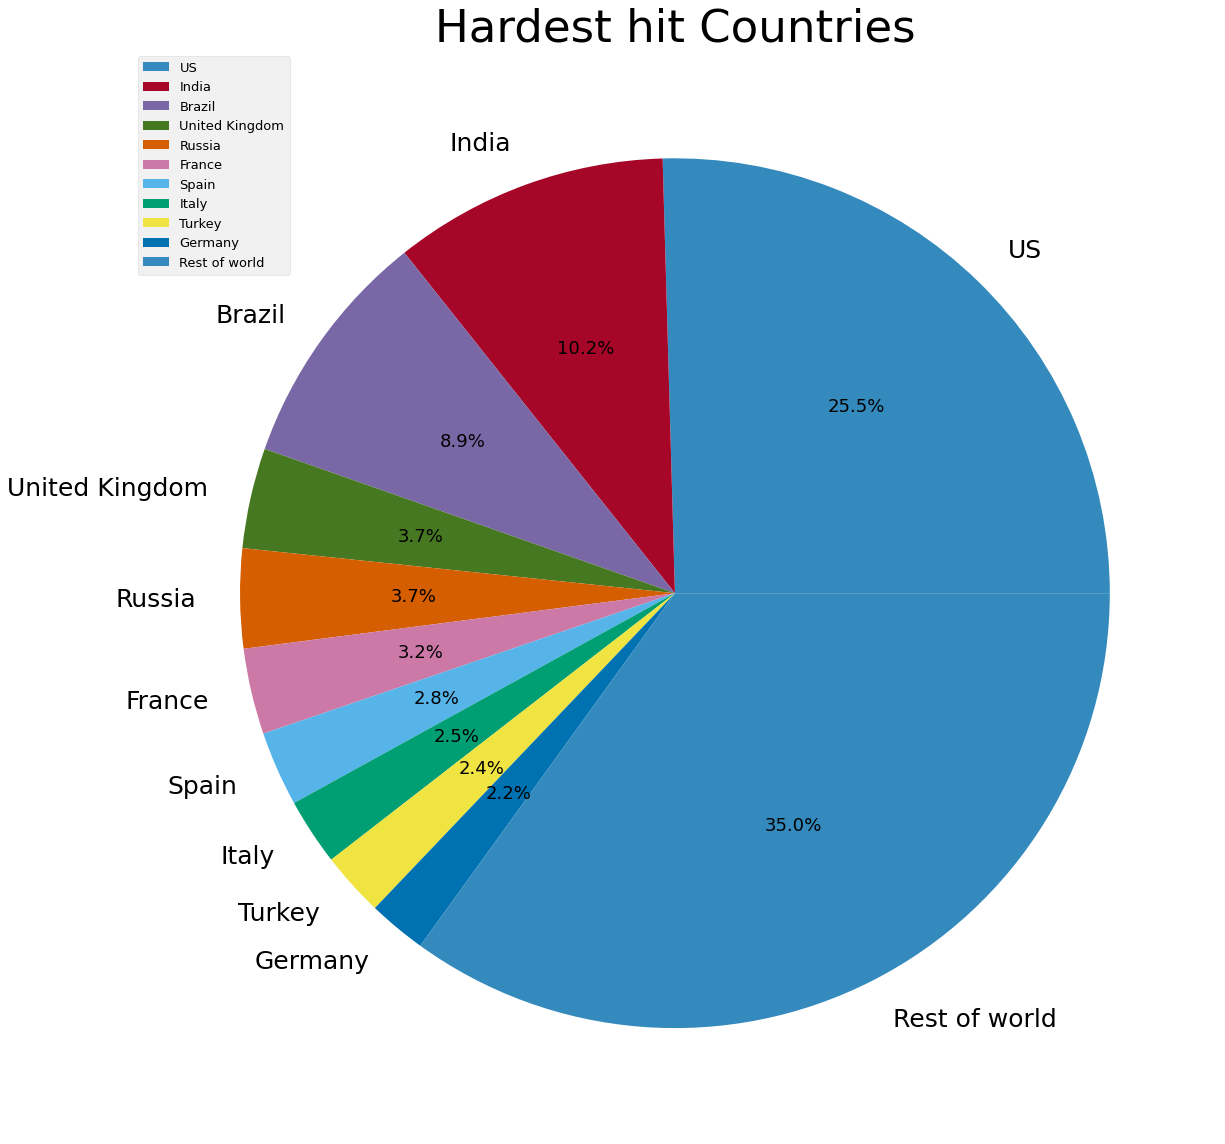

In [10]:
#Hardest hit Countries

## worst hit
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%M-%D')

yesterday = '2021-02-06'
today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'],ascending=False)[:10]
top_10.loc['Rest_of_world'] = today_df.sort_values(['Confirmed'],ascending=False)[10:].sum()
top_10.loc['Rest_of_world','Country'] = 'Rest of world'

pieChart = plt.figure(figsize=(20,20))
ax = pieChart.add_subplot(111)
plt.rc('font', size=18)
plt.rc('legend', fontsize=13)
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('Hardest hit Countries')
plt.legend(loc='upper left')

plt.show()